In [1]:
import ujson
import pandas as pd
import numpy as np
import tqdm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import openTSNE

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as playlist


In [2]:
playlist = pd.DataFrame()

for i in range(10):
    json = ujson.load(open(f'../데이터/user/playlist{i}.json'))
    df = pd.DataFrame(json)
    playlist = pd.concat([playlist, df], axis = 0)


In [3]:
playlist['tracks'] = playlist['tracks'].apply(lambda x: pd.DataFrame(x))

playlist['playlist_id'] = range(1, len(playlist) + 1)
playlist = playlist.set_index('playlist_id')

In [6]:
df = pd.DataFrame()

for i in tqdm.tqdm_notebook(range(1, len(playlist['tracks'])+1)):
    df = pd.concat([df, playlist['tracks'][i]])

C:\Users\ms964\AppData\Local\Temp\ipykernel_9020\2559153013.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(1, len(playlist['tracks'])+1)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [7]:
songs = df.copy()
songs = songs.drop_duplicates(subset='id')

In [8]:
songs_attr = songs[['acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence']]

In [11]:
playlist

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
playlist_id,,,,,,,,,,,,
1,Throwbacks,false,0,1493424000,52,47,1,pos ...,6,11532414,37,None
2,Awesome Playlist,false,1,1506556800,39,23,1,pos ...,5,11656470,21,None
3,korean,false,2,1505692800,64,51,1,pos a...,18,14039958,31,None
4,mat,false,3,1501027200,126,107,1,pos ...,4,28926058,86,None
5,90s,false,4,1401667200,17,16,2,pos ...,7,4335282,16,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,rap,false,9995,1491782400,34,26,1,pos ...,16,8530582,15,None
9997,Blues,false,9996,1482364800,57,48,1,pos ...,15,13010049,30,None
9998,game songs,false,9997,1508371200,27,24,4,pos ...,23,5104068,7,None


In [17]:
playlist.loc[1]['tracks']

,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0UaMYEvWZi0ZqiDOoHU3YI,0.031100,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,0.810
spotify:track:0WqIKmW4BTrj3eJFmnCKMv,2,Beyoncé,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0WqIKmW4BTrj3eJFmnCKMv,0.002380,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,0.701
spotify:track:0XUfyU2QviPAs6bxSpXYG4,5,Usher,spotify:artist:23zg3TcAtWQy7J6upgbUnj,Yeah!,spotify:album:0vO0b1AvY49CPQyVisJLj0,250373,Confessions,0XUfyU2QviPAs6bxSpXYG4,0.021200,0.881,0.788,0.000000,0.0377,-4.669,0.1680,104.997,0.592
spotify:track:0uqPG793dkDDN7sCUJJIVC,21,The Black Eyed Peas,spotify:artist:1yxSLGMDHlW21z4YXirZDS,Where Is The Love?,spotify:album:1bNyYpkDRovmErm4QeDrpJ,272533,Elephunk,0uqPG793dkDDN7sCUJJIVC,0.101000,0.835,0.687,0.000000,0.1320,-3.180,0.1840,94.059,0.828
spotify:track:12qZHAeOyTf93YAWvGDTat,39,blink-182,spotify:artist:6FBDaR13swtiWwGhX1WQsP,All The Small Things,spotify:album:1fF8kYX49s5Ufv4XEY5sjW,168000,Enema Of The State,12qZHAeOyTf93YAWvGDTat,0.008440,0.442,0.893,0.000000,0.5290,-4.878,0.0505,148.119,0.712
spotify:track:19Js5ypV6JKn4DMExHQbGc,22,Bowling For Soup,spotify:artist:5ND0mGcL9SKSjWIjPd0xIb,Stacy's Mom,spotify:album:3Q7xpHmP8k3HryE0LQdIk0,193042,I've Never Done Anything Like This,19Js5ypV6JKn4DMExHQbGc,0.003490,0.728,0.801,0.000195,0.0907,-3.636,0.0752,119.989,0.813
spotify:track:1AWQoqb9bSvzTjaLralEkT,3,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,1AWQoqb9bSvzTjaLralEkT,0.202000,0.891,0.714,0.000234,0.0521,-6.055,0.1400,100.972,0.818
spotify:track:1Bv0Yl01xBDZD4OQP93fyl,15,Omarion,spotify:artist:0f5nVCcR06GX8Qikz0COtT,Ice Box,spotify:album:4cVVEOXyUaWo7vlDWIkKsI,256426,21,1Bv0Yl01xBDZD4OQP93fyl,0.189000,0.775,0.731,0.000000,0.1290,-5.446,0.1340,131.103,0.821
spotify:track:1HwpWwa6bnqqRhK8agG4RS,12,Jesse McCartney,spotify:artist:2Hjj68yyUPiC0HKEOigcEp,Beautiful Soul,spotify:album:2gidE8vgVOkYufANjuvj3S,214226,Beautiful Soul,1HwpWwa6bnqqRhK8agG4RS,0.075900,0.660,0.666,0.000000,0.0268,-4.342,0.0472,89.975,0.933
spotify:track:1JURww012QnWAw0zZXi6Aa,23,The Click Five,spotify:artist:01lz5VBfkMFDteSA9pKJuP,Just The Girl,spotify:album:7gZilZGYr8M7UwEeYvdAKZ,234146,Greetings From Imrie House,1JURww012QnWAw0zZXi6Aa,0.005090,0.571,0.890,0.000000,0.0769,-1.600,0.0395,110.958,0.751


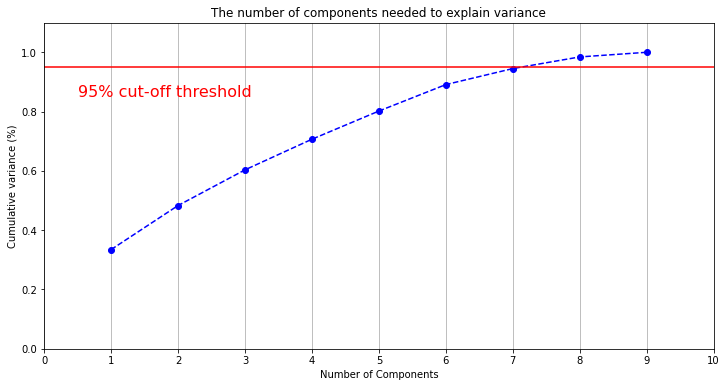

In [27]:
scaled_attr = StandardScaler().fit_transform(songs_attr)
pca = PCA().fit(scaled_attr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [28]:
scaled_attr = StandardScaler().fit_transform(songs_attr)
pca = PCA(n_components = 7).fit(scaled_attr)

components = pca.fit_transform(scaled_attr)

pca.explained_variance_ratio_ * 100

array([33.45005724, 14.8557137 , 12.03860433, 10.33369138,  9.50276251,
        8.92757049,  5.39680413])

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import tqdm
from sklearn.metrics import davies_bouldin_score

KS = range(3, 15)
inertia = list()
davies_score = list()

components = pd.DataFrame(components)

for k in tqdm.tqdm_notebook(KS):
    model = KMeans(n_clusters = k, )
    model.fit(components)
    inertia.append(model.inertia_)
    davies_score.append(davies_bouldin_score(components, model.labels_))

C:\Users\ms964\AppData\Local\Temp\ipykernel_24396\2789020211.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm.tqdm_notebook(KS):


  0%|          | 0/12 [00:00<?, ?it/s]

7


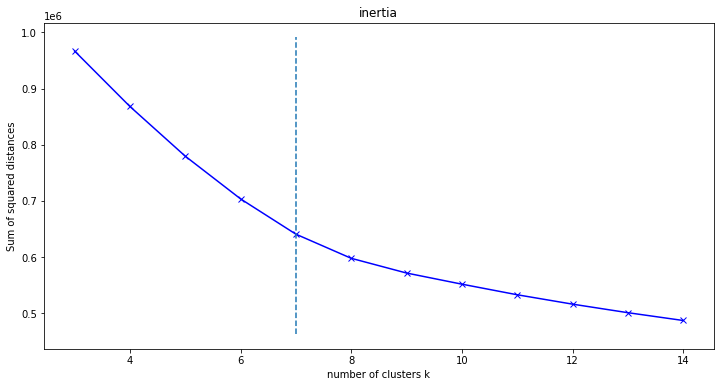

7


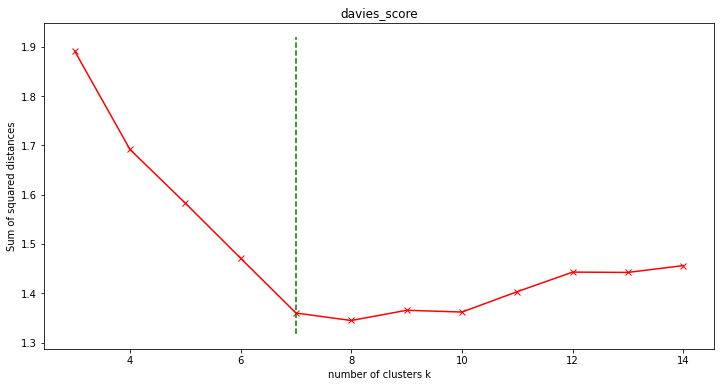

In [30]:
from kneed import KneeLocator
kn = KneeLocator(KS, inertia, curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(KS, inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('inertia')
plt.show()

kn = KneeLocator(KS, davies_score, curve='convex', direction='decreasing')
print(kn.knee)

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(KS, davies_score, 'rx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',colors='g')
plt.title('davies_score')
plt.show()

In [31]:
from sklearn.cluster import KMeans
import tqdm

model = KMeans(n_clusters=7, random_state=42,init='random')
model.fit(components)
songs_attr['predict'] = model.labels_

C:\Users\ms964\AppData\Local\Temp\ipykernel_24396\847123394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_attr['predict'] = model.labels_


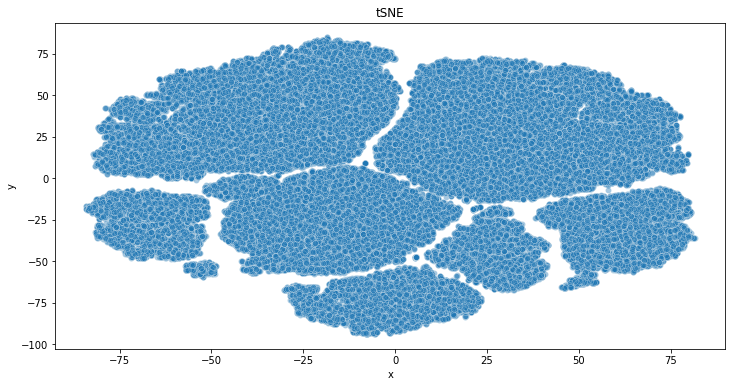

In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import openTSNE

import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

scaled_attr = StandardScaler().fit_transform(songs_attr)

tsne = openTSNE.TSNE(
    perplexity=30,
    initialization="random",
    metric="manhattan",
    n_jobs=8,
    random_state=3,
).fit(scaled_attr)
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1]})

# fig = px.scatter(
#     tsne_df,
#     x = 'x',
#     y = 'y')

sns.scatterplot(
    x = 'x', y = 'y',
    palette = sns.color_palette("Set1", 7),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE")

plt.show()


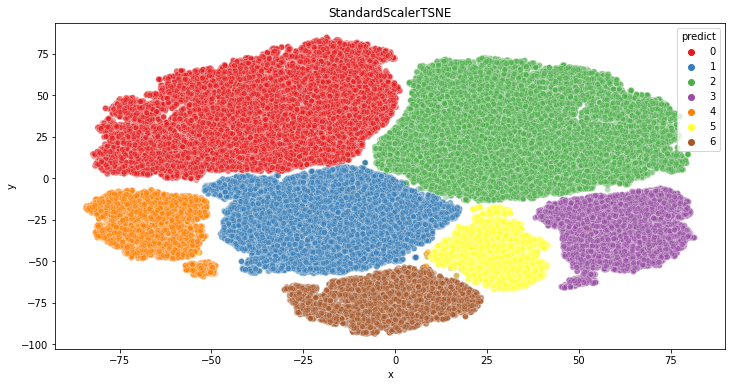

In [34]:
tsne_df['predict'] = model.labels_

sns.scatterplot(
    x = 'x', y = 'y',
    palette = sns.color_palette("Set1", 7),
    data = tsne_df,
    legend = "full",
    alpha = 0.4,
    hue = 'predict')

plt.title("StandardScalerTSNE")

plt.show()

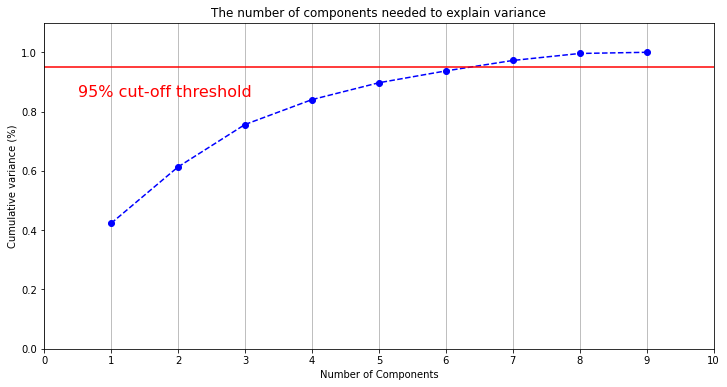

In [36]:
songs_attr = songs[['acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence']]
       
scaled_attr = MinMaxScaler().fit_transform(songs_attr)
pca = PCA().fit(scaled_attr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [37]:
scaled_attr = MinMaxScaler().fit_transform(songs_attr)
pca = PCA(n_components = 7).fit(scaled_attr)

components = pca.fit_transform(scaled_attr)

pca.explained_variance_ratio_ * 100

array([42.30452192, 19.01811228, 14.31655793,  8.39526156,  5.69335533,
        3.99555213,  3.51821833])

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import tqdm
from sklearn.metrics import davies_bouldin_score

KS = range(3, 15)
inertia = list()
davies_score = list()

components = pd.DataFrame(components)

for k in tqdm.tqdm_notebook(KS):
    model = KMeans(n_clusters = k, )
    model.fit(components)
    inertia.append(model.inertia_)
    davies_score.append(davies_bouldin_score(components, model.labels_))

C:\Users\ms964\AppData\Local\Temp\ipykernel_24396\2789020211.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm.tqdm_notebook(KS):


  0%|          | 0/12 [00:00<?, ?it/s]

7


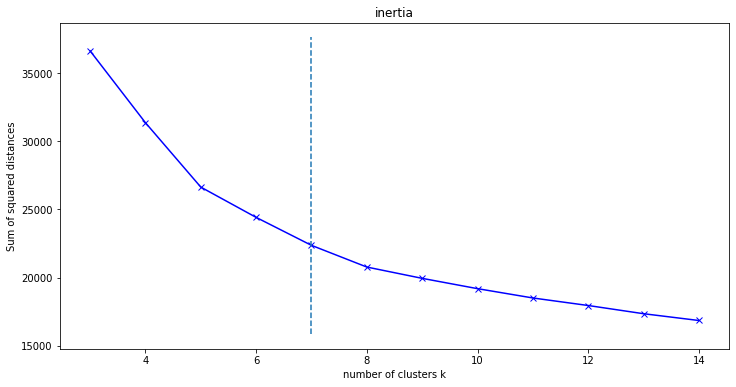

3


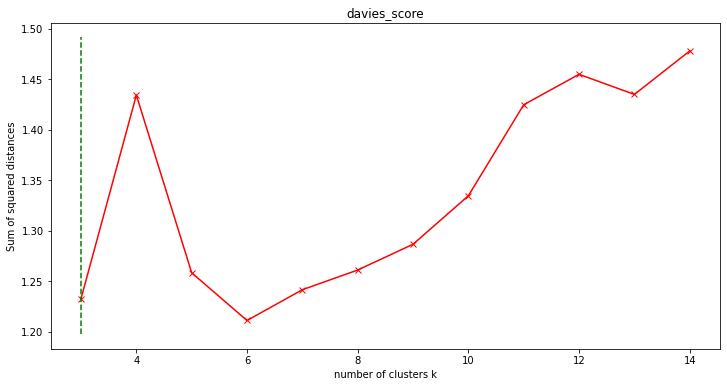

In [39]:
from kneed import KneeLocator
kn = KneeLocator(KS, inertia, curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(KS, inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('inertia')
plt.show()

kn = KneeLocator(KS, davies_score, curve='convex', direction='decreasing')
print(kn.knee)

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(KS, davies_score, 'rx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',colors='g')
plt.title('davies_score')
plt.show()

In [40]:
from sklearn.cluster import KMeans
import tqdm

model = KMeans(n_clusters=7, random_state=42,init='random')
model.fit(components)
songs_attr['predict'] = model.labels_

C:\Users\ms964\AppData\Local\Temp\ipykernel_24396\847123394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_attr['predict'] = model.labels_


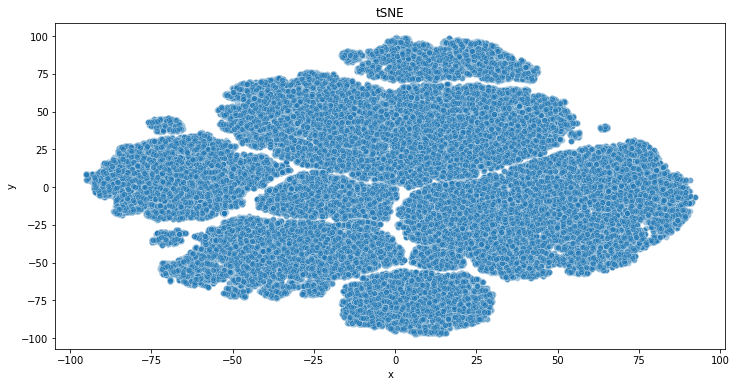

In [42]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import openTSNE

import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

scaled_attr = MinMaxScaler().fit_transform(songs_attr)

tsne = openTSNE.TSNE(
    perplexity=30,
    initialization="random",
    metric="euclidean",
    n_jobs=8,
    random_state=3,
).fit(scaled_attr)
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1]})

# fig = px.scatter(
#     tsne_df,
#     x = 'x',
#     y = 'y')

sns.scatterplot(
    x = 'x', y = 'y',
    palette = sns.color_palette("Set1", 7),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE")

plt.show()


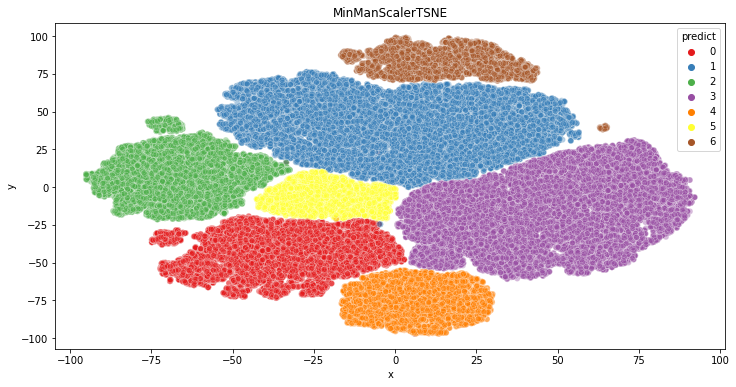

In [43]:
tsne_df['predict'] = model.labels_

sns.scatterplot(
    x = 'x', y = 'y',
    palette = sns.color_palette("Set1", 7),
    data = tsne_df,
    legend = "full",
    alpha = 0.4,
    hue = 'predict')

plt.title("MinManScalerTSNE")

plt.show()

In [ ]:
from sklearn.utils import indexable


for index in tqdm.tqdm_notebook(data.index):
    data['tracks'][index] = data.loc[index, 'tracks'].join(playlist_attr['predict'], how = 'inner')

In [ ]:
from scipy.stats import chisquare

chisquare